**Name : A Preetham Sri Krishna**

**Roll number : CB.EN.U4CSE20210**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

A. Data Manipulation-Pandas

In [ ]:
us_states= pd.read_csv('/content/us states.csv')
us_states

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [ ]:
us_states.shape #the shape of the data (rows, col)

(51, 4)

In [ ]:
us_states.info() #columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       51 non-null     object
 1   State Code  51 non-null     object
 2   Region      51 non-null     object
 3   Division    51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [ ]:
us_states.describe()

,State,State Code,Region,Division
count,51,51,51,51
unique,51,51,4,9
top,Alaska,AK,South,South Atlantic
freq,1,1,17,9


Indexing

In [ ]:
#displaying states located south
us_states_south=us_states[us_states['Region']=='South']
us_states_south

,State,State Code,Region,Division
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic
10,Georgia,GA,South,South Atlantic
17,Kentucky,KY,South,East South Central
18,Louisiana,LA,South,West South Central
20,Maryland,MD,South,South Atlantic
25,Mississippi,MS,South,East South Central


Indexing using log

In [ ]:
region_loc = us_states.set_index('Region')
region_loc.loc['South']

,State,State Code,Division
Region,,,
South,Alabama,AL,East South Central
South,Arkansas,AR,West South Central
South,District of Columbia,DC,South Atlantic
South,Delaware,DE,South Atlantic
South,Florida,FL,South Atlantic
South,Georgia,GA,South Atlantic
South,Kentucky,KY,East South Central
South,Louisiana,LA,West South Central
South,Maryland,MD,South Atlantic


In [ ]:
#separating only Division with region northeast or south
region_loc.loc[['Northeast', 'South'], ['Division']]

,Division
Region,
Northeast,New England
Northeast,New England
Northeast,New England
Northeast,New England
Northeast,Middle Atlantic
Northeast,Middle Atlantic
Northeast,Middle Atlantic
Northeast,New England
Northeast,New England


Using iloc for indexing

In [ ]:
#selecting from 4th to 10th row and 0th to 2st column
us_states.iloc[4:10,:3]

,State,State Code,Region
4,California,CA,West
5,Colorado,CO,West
6,Connecticut,CT,Northeast
7,District of Columbia,DC,South
8,Delaware,DE,South
9,Florida,FL,South


Missing value manipulation

In [ ]:
us_states.isnull().sum() # null values in the dataset

State         0
State Code    0
Region        0
Division      0
dtype: int64

In [ ]:
#there are no null values but if 
#there are null valuses they can be
# filled with mode(as all data is catererical)
for col in us_states:
  if us_states.dtypes[col]is not int:
    us_states[col].fillna(us_states[col].mode(), inplace = True)
  else:
    us_states[col].fillna(us_states[col].median(), inplace = True)
us_states.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


Merging, concating, appending and Joining

In [ ]:
#Concatination
#splittng into dataframes for concatenation
df1 = us_states.iloc[:10,:]
df2 = us_states.iloc[12:15,:]
df3 = us_states.iloc[20:35,:]
print(df1.head(), df2.head(), df3.head())

        State State Code Region            Division
0      Alaska         AK   West             Pacific
1     Alabama         AL  South  East South Central
2    Arkansas         AR  South  West South Central
3     Arizona         AZ   West            Mountain
4  California         CA   West             Pacific        State State Code   Region            Division
12      Iowa         IA  Midwest  West North Central
13     Idaho         ID     West            Mountain
14  Illinois         IL  Midwest  East North Central         State State Code     Region            Division
20   Maryland         MD      South      South Atlantic
21      Maine         ME  Northeast         New England
22   Michigan         MI    Midwest  East North Central
23  Minnesota         MN    Midwest  West North Central
24   Missouri         MO    Midwest  West North Central


In [ ]:
#concating in order 2,3,1
concat_df = pd.concat([df2, df3, df1])
concat_df

,State,State Code,Region,Division
12,Iowa,IA,Midwest,West North Central
13,Idaho,ID,West,Mountain
14,Illinois,IL,Midwest,East North Central
20,Maryland,MD,South,South Atlantic
21,Maine,ME,Northeast,New England
22,Michigan,MI,Midwest,East North Central
23,Minnesota,MN,Midwest,West North Central
24,Missouri,MO,Midwest,West North Central
25,Mississippi,MS,South,East South Central
26,Montana,MT,West,Mountain


In [ ]:
#Appending df2 to df1
df1.append(df2)

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [ ]:
#Merging
#dividing the dataframes
df_1 = us_states.iloc[:, :3]
df_2 = us_states.iloc[:, 2:]

In [ ]:
df_2.head()

,Region,Division
0,West,Pacific
1,South,East South Central
2,South,West South Central
3,West,Mountain
4,West,Pacific


In [ ]:
df_1.head()

,State,State Code,Region
0,Alaska,AK,West
1,Alabama,AL,South
2,Arkansas,AR,South
3,Arizona,AZ,West
4,California,CA,West


In [ ]:
pd.merge(df_1, df_2,how = 'left', left_on='Region',right_on='Region')
#got all possible items as region is repetative
#take ref as state or state code for removing duplicates instead region

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alaska,AK,West,Mountain
2,Alaska,AK,West,Pacific
3,Alaska,AK,West,Mountain
4,Alaska,AK,West,Pacific
...,...,...,...,...
678,Wyoming,WY,West,Mountain
679,Wyoming,WY,West,Pacific
680,Wyoming,WY,West,Mountain
681,Wyoming,WY,West,Pacific


In [ ]:
#Joining
df_1.join(df_2,lsuffix='1',rsuffix='2',how = 'inner')

,State,State Code,Region1,Region2,Division
0,Alaska,AK,West,West,Pacific
1,Alabama,AL,South,South,East South Central
2,Arkansas,AR,South,South,West South Central
3,Arizona,AZ,West,West,Mountain
4,California,CA,West,West,Pacific
5,Colorado,CO,West,West,Mountain
6,Connecticut,CT,Northeast,Northeast,New England
7,District of Columbia,DC,South,South,South Atlantic
8,Delaware,DE,South,South,South Atlantic
9,Florida,FL,South,South,South Atlantic


In [ ]:
#Aggregation
us_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       51 non-null     object
 1   State Code  51 non-null     object
 2   Region      51 non-null     object
 3   Division    51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [ ]:
#Grouping
gr=us_states.groupby('Region')
gr.describe()

State                          State Code                 Division  \
          count unique          top freq      count unique top freq    count   
Region                                                                         
Midwest      12     12         Iowa    1         12     12  IA    1       12   
Northeast     9      9  Connecticut    1          9      9  CT    1        9   
South        17     17      Alabama    1         17     17  AL    1       17   
West         13     13       Alaska    1         13     13  AK    1       13   

                                           
          unique                 top freq  
Region                                     
Midwest        2  West North Central    7  
Northeast      2         New England    6  
South          3      South Atlantic    9  
West           2            Mountain    8

In [ ]:
#Transform
from sklearn.preprocessing import LabelEncoder
print(us_states.iloc[:,3].head())
le = LabelEncoder()
tf=le.fit_transform(us_states.iloc[:,3])
tf

0               Pacific
1    East South Central
2    West South Central
3              Mountain
4               Pacific
Name: Division, dtype: object


array([5, 1, 8, 3, 5, 3, 4, 6, 6, 6, 6, 5, 7, 3, 0, 0, 7, 1, 8, 4, 6, 4,
       0, 7, 7, 1, 3, 6, 7, 7, 4, 2, 3, 3, 2, 0, 8, 5, 2, 4, 6, 7, 1, 8,
       3, 6, 4, 5, 0, 6, 3])

In [ ]:
#Apply
tf.sum()

218

In [ ]:
#Pivot tables
pd.pivot_table(us_states,columns=['Region'], values=['Division'])

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


Region


B. Time Series 
Q2. Demonstrate the following functions: 


In [ ]:
seatle = pd.read_csv('/content/Seattle2014.csv')
seatle.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [ ]:
seatle['DATE'] = pd.to_datetime(seatle['DATE'])
seatle.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01 00:00:00.020140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01 00:00:00.020140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01 00:00:00.020140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01 00:00:00.020140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1970-01-01 00:00:00.020140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [ ]:
seatle.index = seatle['DATE']
seatle.drop(columns='DATE',inplace=True)
seatle.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
DATE,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.020140101,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1970-01-01 00:00:00.020140102,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
1970-01-01 00:00:00.020140103,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
1970-01-01 00:00:00.020140104,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
1970-01-01 00:00:00.020140105,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [ ]:
seatle.columns

Index(['STATION', 'STATION_NAME', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN',
       'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT05', 'WT02', 'WT03'],
      dtype='object')

In [ ]:
seatle['PRCP']

DATE
1970-01-01 00:00:00.020140101     0
1970-01-01 00:00:00.020140102    41
1970-01-01 00:00:00.020140103    15
1970-01-01 00:00:00.020140104     0
1970-01-01 00:00:00.020140105     0
                                 ..
1970-01-01 00:00:00.020141227    33
1970-01-01 00:00:00.020141228    41
1970-01-01 00:00:00.020141229     0
1970-01-01 00:00:00.020141230     0
1970-01-01 00:00:00.020141231     0
Name: PRCP, Length: 365, dtype: int64

In [ ]:
seatle_resampled = seatle[['PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN',
       'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT05', 'WT02', 'WT03']].resample('M').mean()

In [ ]:
seatle_resampled

,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
DATE,,,,,,,,,,,,,,
1970-01-31,33.775342,0.219178,-54.531507,169.958904,86.624658,33.876712,181.657534,-227.232877,75.463014,-314.090411,-5834.616438,-9999.0,-9642.835616,-9916.808219


In [ ]:
seatle.shift(3)

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
DATE,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.020140101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.020140102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.020140103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.020140104,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0.0,0.0,72.0,33.0,12.0,340.0,310.0,36.0,40.0,-9999.0,-9999.0,-9999.0,-9999.0
1970-01-01 00:00:00.020140105,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,41.0,0.0,0.0,106.0,61.0,32.0,190.0,200.0,94.0,116.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.020141227,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,53.0,0.0,0.0,72.0,39.0,18.0,170.0,190.0,40.0,58.0,1.0,-9999.0,-9999.0,-9999.0
1970-01-01 00:00:00.020141228,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0.0,0.0,78.0,28.0,22.0,130.0,130.0,45.0,54.0,1.0,-9999.0,1.0,-9999.0
1970-01-01 00:00:00.020141229,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.0,0.0,0.0,56.0,17.0,12.0,160.0,160.0,45.0,54.0,1.0,-9999.0,1.0,-9999.0


In [ ]:
seatle.rolling(window=3).mean()

,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
DATE,,,,,,,,,,,,,,
1970-01-01 00:00:00.020140101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.020140102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.020140103,18.666667,0.0,0.0,89.000000,40.666667,23.333333,186.666667,186.666667,64.333333,76.000000,-6665.666667,-9999.0,-9999.000000,-9999.0
1970-01-01 00:00:00.020140104,18.666667,0.0,0.0,91.000000,31.666667,28.333333,86.666667,96.666667,67.333333,82.000000,-3332.333333,-9999.0,-9999.000000,-9999.0
1970-01-01 00:00:00.020140105,5.000000,0.0,0.0,83.333333,9.666667,30.000000,26.666667,33.333333,58.333333,68.666667,-3332.333333,-9999.0,-9999.000000,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.020141227,11.000000,0.0,0.0,76.000000,29.666667,27.666667,166.666667,166.666667,67.333333,89.666667,1.000000,-9999.0,-3332.333333,-9999.0
1970-01-01 00:00:00.020141228,24.666667,0.0,0.0,72.333333,29.666667,26.333333,140.000000,133.333333,71.666667,95.666667,1.000000,-9999.0,-6665.666667,-9999.0
1970-01-01 00:00:00.020141229,24.666667,0.0,0.0,74.000000,26.000000,36.666667,203.333333,196.666667,82.000000,112.000000,1.000000,-9999.0,-9999.000000,-9999.0


In [ ]:
seatle.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
DATE,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.020140101,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1970-01-01 00:00:00.020140102,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
1970-01-01 00:00:00.020140103,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
1970-01-01 00:00:00.020140104,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
1970-01-01 00:00:00.020140105,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


Visuvilzation

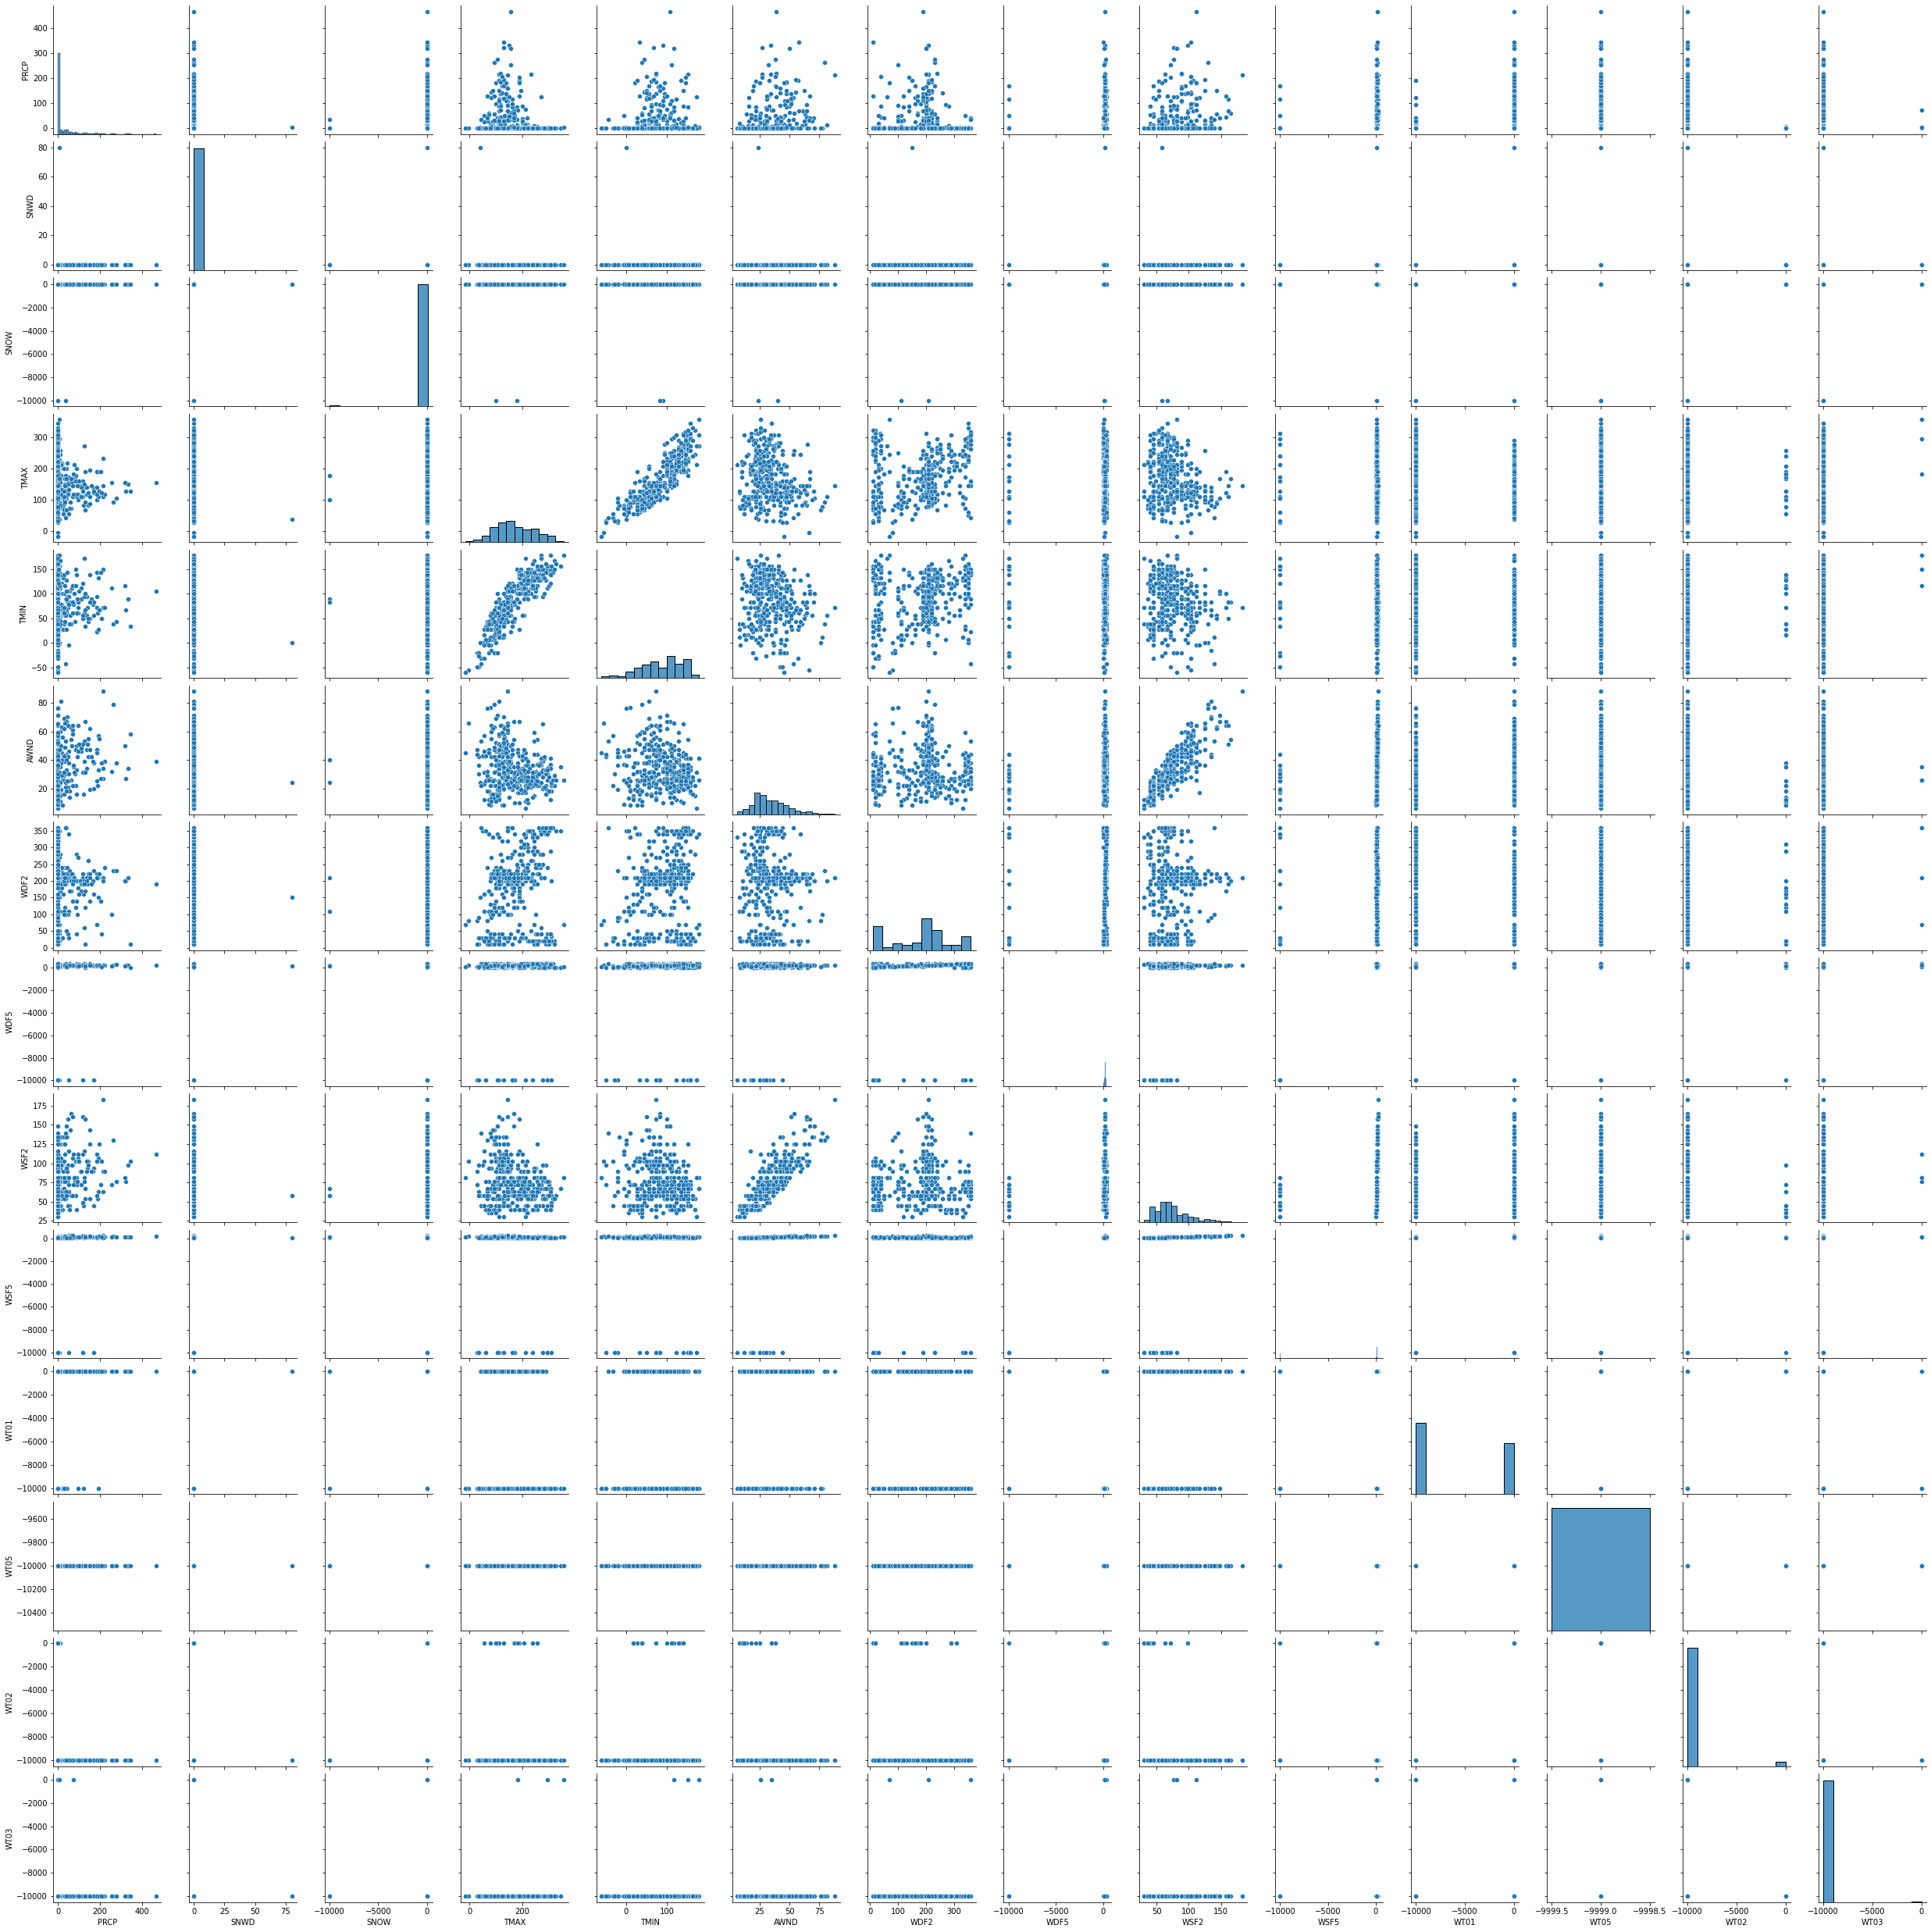

In [ ]:
sns.pairplot(seatle)

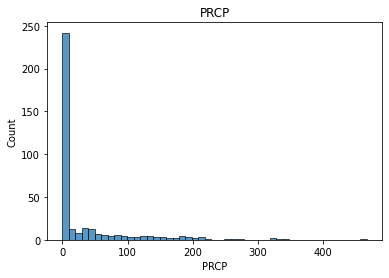

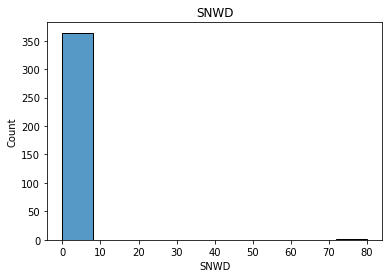

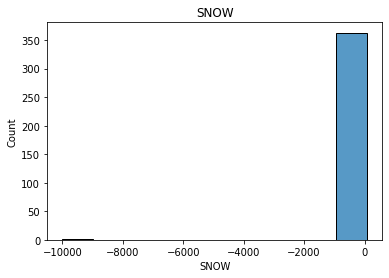

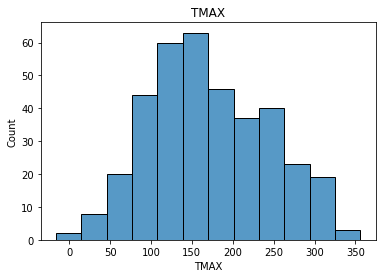

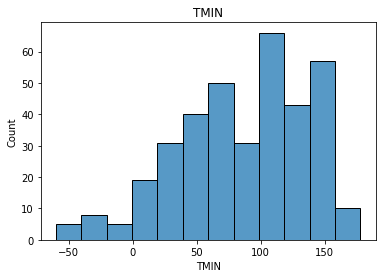

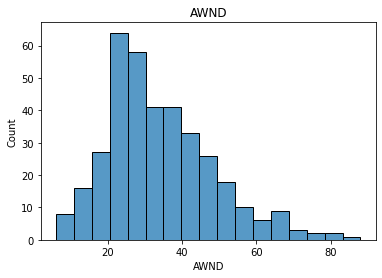

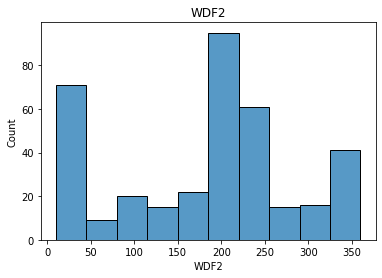

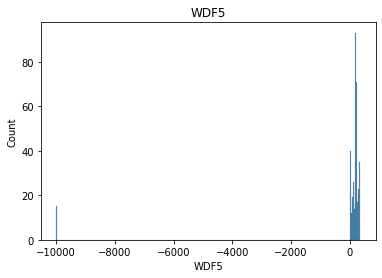

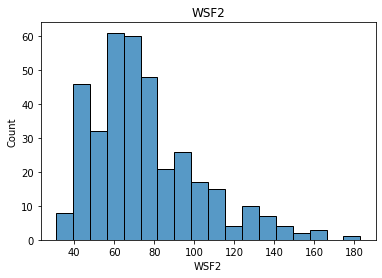

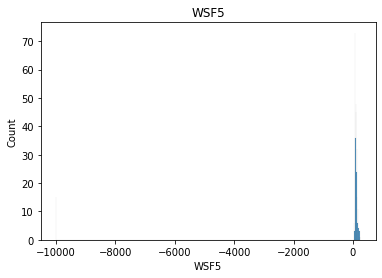

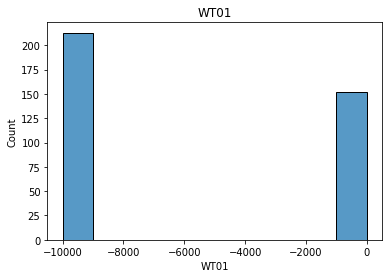

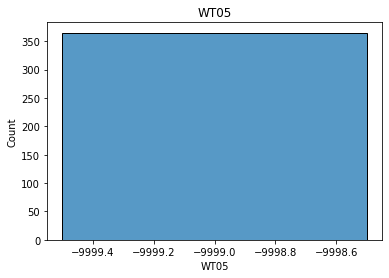

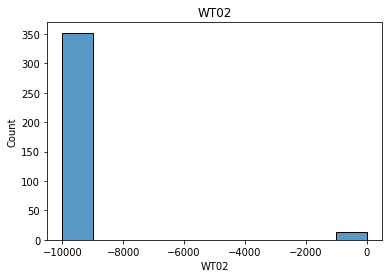

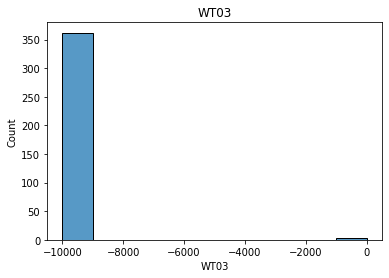

In [ ]:
for col in seatle.columns[2:]:
    sns.histplot(seatle[col])
    plt.title(col)
    plt.show()

In [ ]:
#So,form graphs PRCP, TWAF, AWND   are positively skewed and
# TMIN is negatively skewed

Q3. Demonstrate the following pre-processing activities: 

In [ ]:
stocks = pd.read_csv('/content/stock_px_2.csv', index_col=0,parse_dates=True)
stocks.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


Indexing, Selection, subsetting


In [ ]:
#indexed based on time
stocks['AAPL'].loc['2003-01-06']

7.45

In [ ]:
stocks.index.is_unique

True

In [ ]:
#drop duplicates
#apply stocks
stocks.loc[:,['AAPL']]

,AAPL
2003-01-02,7.40
2003-01-03,7.45
2003-01-06,7.45
2003-01-07,7.43
2003-01-08,7.28
...,...
2011-10-10,388.81
2011-10-11,400.29
2011-10-12,402.19
2011-10-13,408.43


In [ ]:
#Exxon Corp stock
stocks.loc[:,['XOM']]

,XOM
2003-01-02,29.22
2003-01-03,29.24
2003-01-06,29.96
2003-01-07,28.95
2003-01-08,28.83
...,...
2011-10-10,76.28
2011-10-11,76.27
2011-10-12,77.16
2011-10-13,76.37


In [ ]:
#S&P 500 stock
stocks.loc[:,['SPX']]

,SPX
2003-01-02,909.03
2003-01-03,908.59
2003-01-06,929.01
2003-01-07,922.93
2003-01-08,909.93
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


In [ ]:
stocks.loc['2010'].count()

AAPL    252
MSFT    252
XOM     252
SPX     252
dtype: int64

In [ ]:
stocks.loc['2011-10'].count()

AAPL    10
MSFT    10
XOM     10
SPX     10
dtype: int64

In [ ]:
stocks['SPX'][stocks['SPX']>1000]

2003-06-16    1010.74
2003-06-17    1011.66
2003-06-18    1010.09
2003-07-07    1004.42
2003-07-08    1007.84
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 1847, dtype: float64

In [ ]:
stocks['AAPL'][stocks['AAPL']>10]

2003-07-08     10.20
2003-07-17     10.45
2003-07-18     10.43
2003-07-21     10.31
2003-07-22     10.40
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, Length: 2069, dtype: float64

In [ ]:
temp=stocks.copy()

In [ ]:
temp['Sum']=temp['AAPL']+temp['SPX']+temp['MSFT']+temp['XOM']
temp

,AAPL,MSFT,XOM,SPX,Sum
2003-01-02,7.40,21.11,29.22,909.03,966.76
2003-01-03,7.45,21.14,29.24,908.59,966.42
2003-01-06,7.45,21.52,29.96,929.01,987.94
2003-01-07,7.43,21.93,28.95,922.93,981.24
2003-01-08,7.28,21.31,28.83,909.93,967.35
...,...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89,1686.92
2011-10-11,400.29,27.00,76.27,1195.54,1699.10
2011-10-12,402.19,26.96,77.16,1207.25,1713.56
2011-10-13,408.43,27.18,76.37,1203.66,1715.64


Text(0, 0.5, 'Year')

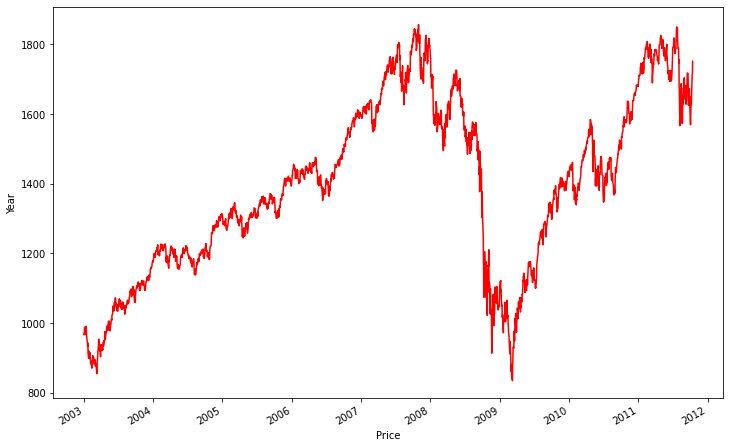

In [ ]:
temp.iloc[:,4].plot(figsize=(12,8),color='red')
plt.xlabel('Price')
plt.ylabel('Year')

Text(0, 0.5, 'data price')

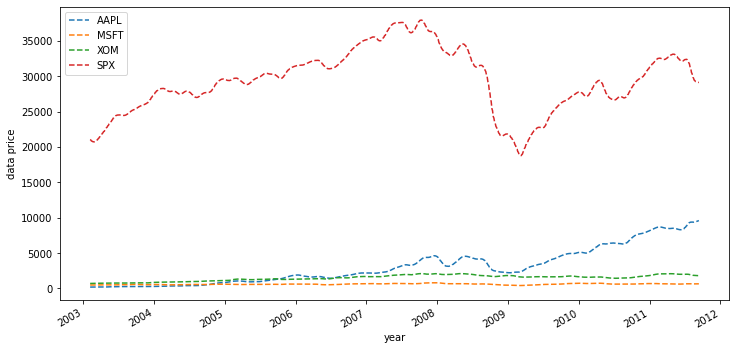

In [ ]:
stocks.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style= '--',figsize=(12,6));
plt.xlabel("year")
plt.ylabel("data price")

Data Ranges, Frequencies and shifting(Leading and lagging)

In [ ]:
from datetime import datetime
current = datetime.now().time() 
print("present =", current)

present = 16:20:42.626105


In [ ]:
data2=pd.read_csv('/content/stock_px_2.csv',parse_dates=True)
data2['Unnamed: 0']

0       2003-01-02 00:00:00
1       2003-01-03 00:00:00
2       2003-01-06 00:00:00
3       2003-01-07 00:00:00
4       2003-01-08 00:00:00
               ...         
2209    2011-10-10 00:00:00
2210    2011-10-11 00:00:00
2211    2011-10-12 00:00:00
2212    2011-10-13 00:00:00
2213    2011-10-14 00:00:00
Name: Unnamed: 0, Length: 2214, dtype: object

In [ ]:
import datetime
datetime.datetime.combine(datetime.date(2011, 1, 1), datetime.time(10, 23))

datetime.datetime(2011, 1, 1, 10, 23)

In [ ]:
pd.date_range(start='2011-04-01', periods=20)

DatetimeIndex(['2011-04-01', '2011-04-02', '2011-04-03', '2011-04-04',
               '2011-04-05', '2011-04-06', '2011-04-07', '2011-04-08',
               '2011-04-09', '2011-04-10', '2011-04-11', '2011-04-12',
               '2011-04-13', '2011-04-14', '2011-04-15', '2011-04-16',
               '2011-04-17', '2011-04-18', '2011-04-19', '2011-04-20'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range(end='2011-04-01', periods=20)

DatetimeIndex(['2011-03-13', '2011-03-14', '2011-03-15', '2011-03-16',
               '2011-03-17', '2011-03-18', '2011-03-19', '2011-03-20',
               '2011-03-21', '2011-03-22', '2011-03-23', '2011-03-24',
               '2011-03-25', '2011-03-26', '2011-03-27', '2011-03-28',
               '2011-03-29', '2011-03-30', '2011-03-31', '2011-04-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [ ]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [ ]:
pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [ ]:
#shifting
stocks.shift(1, axis = 1)#for col

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,7.40,21.11,29.22
2003-01-03,NaN,7.45,21.14,29.24
2003-01-06,NaN,7.45,21.52,29.96
2003-01-07,NaN,7.43,21.93,28.95
2003-01-08,NaN,7.28,21.31,28.83
...,...,...,...,...
2011-10-10,NaN,388.81,26.94,76.28
2011-10-11,NaN,400.29,27.00,76.27
2011-10-12,NaN,402.19,26.96,77.16
2011-10-13,NaN,408.43,27.18,76.37


In [ ]:
stocks.shift(1, axis = 0)#for rowa

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,7.40,21.11,29.22,909.03
2003-01-06,7.45,21.14,29.24,908.59
2003-01-07,7.45,21.52,29.96,929.01
2003-01-08,7.43,21.93,28.95,922.93
...,...,...,...,...
2011-10-10,369.80,26.25,73.56,1155.46
2011-10-11,388.81,26.94,76.28,1194.89
2011-10-12,400.29,27.00,76.27,1195.54
2011-10-13,402.19,26.96,77.16,1207.25


In [ ]:
stocks.shift(-2, axis = 0)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.45,21.52,29.96,929.01
2003-01-03,7.43,21.93,28.95,922.93
2003-01-06,7.28,21.31,28.83,909.93
2003-01-07,7.34,21.93,29.44,927.57
2003-01-08,7.36,21.97,29.03,927.57
...,...,...,...,...
2011-10-10,402.19,26.96,77.16,1207.25
2011-10-11,408.43,27.18,76.37,1203.66
2011-10-12,422.00,27.27,78.11,1224.58
2011-10-13,NaN,NaN,NaN,NaN


In [ ]:
stocks.shift(-2, axis = 1)

,AAPL,MSFT,XOM,SPX
2003-01-02,29.22,909.03,NaN,NaN
2003-01-03,29.24,908.59,NaN,NaN
2003-01-06,29.96,929.01,NaN,NaN
2003-01-07,28.95,922.93,NaN,NaN
2003-01-08,28.83,909.93,NaN,NaN
...,...,...,...,...
2011-10-10,76.28,1194.89,NaN,NaN
2011-10-11,76.27,1195.54,NaN,NaN
2011-10-12,77.16,1207.25,NaN,NaN
2011-10-13,76.37,1203.66,NaN,NaN


Time Localization and converse

In [ ]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [ ]:
df = pytz.timezone('America/New_York')
df

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [ ]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.163853
2012-03-10 09:30:00    1.034302
2012-03-11 09:30:00    0.504752
2012-03-12 09:30:00   -0.233163
2012-03-13 09:30:00   -0.641427
2012-03-14 09:30:00    0.586143
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.163853
2012-03-10 09:30:00+00:00    1.034302
2012-03-11 09:30:00+00:00    0.504752
2012-03-12 09:30:00+00:00   -0.233163
2012-03-13 09:30:00+00:00   -0.641427
2012-03-14 09:30:00+00:00    0.586143
Freq: D, dtype: float64

In [ ]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00   -0.163853
2012-03-10 09:30:00-05:00    1.034302
2012-03-11 09:30:00-04:00    0.504752
2012-03-12 09:30:00-04:00   -0.233163
2012-03-13 09:30:00-04:00   -0.641427
2012-03-14 09:30:00-04:00    0.586143
dtype: float64

In [ ]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.163853
2012-03-10 14:30:00+00:00    1.034302
2012-03-11 13:30:00+00:00    0.504752
2012-03-12 13:30:00+00:00   -0.233163
2012-03-13 13:30:00+00:00   -0.641427
2012-03-14 13:30:00+00:00    0.586143
dtype: float64

Period arthemetic and frequency convertion

In [ ]:
a = pd.Period(2010, freq='A-DEC')
a

Period('2010', 'A-DEC')

In [ ]:
a+5

Period('2015', 'A-DEC')

In [ ]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [ ]:
a.asfreq('M',how='start')

Period('2010-01', 'M')

In [ ]:
a = pd.Period('2007', freq='A-JUN')
a

Period('2007', 'A-JUN')

In [ ]:
a.asfreq('M', 'start')

Period('2006-07', 'M')

In [ ]:
a = pd.Period('2012Q4', freq='Q-JAN')
a

Period('2012Q4', 'Q-JAN')

In [ ]:
a.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [ ]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [ ]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.894471
2000-02-29    0.124162
2000-03-31   -0.746536
Freq: M, dtype: float64

In [ ]:
pts=ts.to_period()
pts

2000-01   -0.894471
2000-02    0.124162
2000-03   -0.746536
Freq: M, dtype: float64

Resampling and frequency coversion

In [ ]:
mean=stocks.resample('M').mean()
mean

,AAPL,MSFT,XOM,SPX
2003-01-31,7.239048,20.742381,28.356190,895.836190
2003-02-28,7.333684,18.786316,27.985263,837.618947
2003-03-31,7.299048,19.395238,29.065238,846.621429
2003-04-30,6.923810,19.871429,29.050476,890.025714
2003-05-31,8.885238,19.946667,29.728571,935.962857
...,...,...,...,...
2011-06-30,331.081364,24.299091,79.365909,1287.288636
2011-07-31,372.238000,26.799000,82.196500,1325.184500
2011-08-31,376.762609,25.317826,73.058696,1185.305652
2011-09-30,392.493333,25.969048,72.399524,1173.879048


Text(0, 0.5, 'monthly mean of stock price')

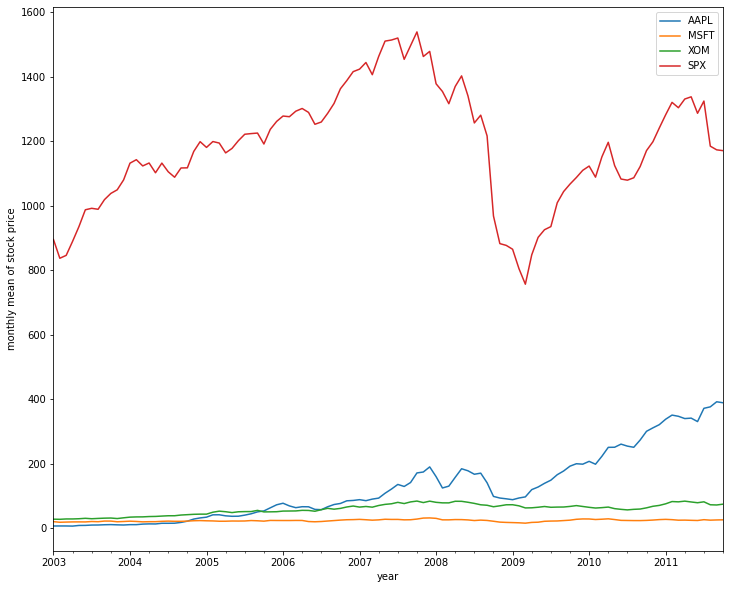

In [ ]:
mean.plot(style='-',figsize=(12,10))
plt.xlabel("year")
plt.ylabel("monthly mean of stock price")

In [ ]:
sum_month=stocks.resample('M').sum()
sum_month

,AAPL,MSFT,XOM,SPX
2003-01-31,152.02,435.59,595.48,18812.56
2003-02-28,139.34,356.94,531.72,15914.76
2003-03-31,153.28,407.30,610.37,17779.05
2003-04-30,145.40,417.30,610.06,18690.54
2003-05-31,186.59,418.88,624.30,19655.22
...,...,...,...,...
2011-06-30,7283.79,534.58,1746.05,28320.35
2011-07-31,7444.76,535.98,1643.93,26503.69
2011-08-31,8665.54,582.31,1680.35,27262.03
2011-09-30,8242.36,545.35,1520.39,24651.46


Text(0, 0.5, 'monthly sum of stock price')

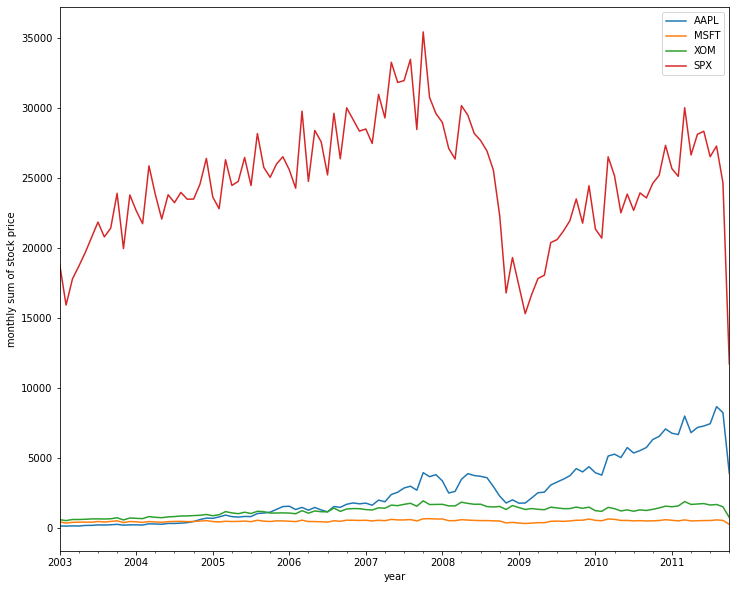

In [ ]:
sum_month.plot(style='-',figsize=(12,10))
plt.xlabel("year")
plt.ylabel("monthly sum of stock price")

In [ ]:
std_month=stocks.resample('M').std()
std_month

,AAPL,MSFT,XOM,SPX
2003-01-31,0.173577,1.203287,0.982005,30.056188
2003-02-28,0.145190,0.400738,0.355549,10.717981
2003-03-31,0.133862,0.974862,0.529524,27.253559
2003-04-30,0.258001,0.409100,0.314269,18.846719
2003-05-31,0.634591,0.634896,0.414551,12.824100
...,...,...,...,...
2011-06-30,7.810975,0.652752,1.243006,16.078314
2011-07-31,19.197723,0.592167,1.336800,17.310910
2011-08-31,11.792712,0.896731,2.595504,44.669536
2011-09-30,12.294938,0.679838,1.444176,25.762277


Text(0, 0.5, 'monthly std of stock price')

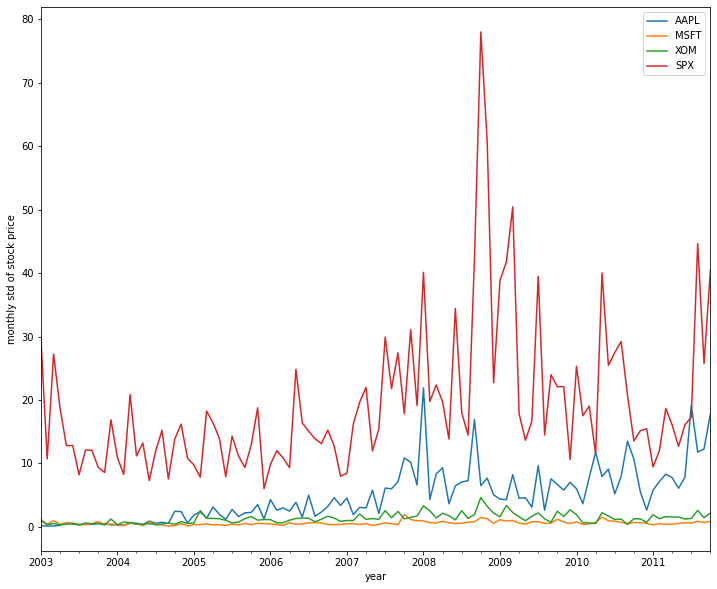

In [ ]:
std_month.plot(style='-',figsize=(12,10))
plt.xlabel("year")
plt.ylabel("monthly std of stock price")

Downsampling

In [ ]:
#Aggregating 1 week full of days into a single data
sample=stocks.resample('W',closed='right').sum()
sample

,AAPL,MSFT,XOM,SPX
2003-01-05,14.85,42.25,58.46,1817.62
2003-01-12,36.86,108.66,146.21,4617.01
2003-01-19,36.20,108.63,144.35,4592.52
2003-01-26,27.94,80.34,109.97,3514.72
2003-02-02,36.17,95.71,136.49,4270.69
...,...,...,...,...
2011-09-18,1947.32,132.54,364.69,5948.94
2011-09-25,2043.34,130.30,358.23,5838.93
2011-10-02,1971.33,127.03,363.21,5781.21
2011-10-09,1872.52,128.35,365.38,5687.64


Text(0, 0.5, 'downsampled price of stock(data)')

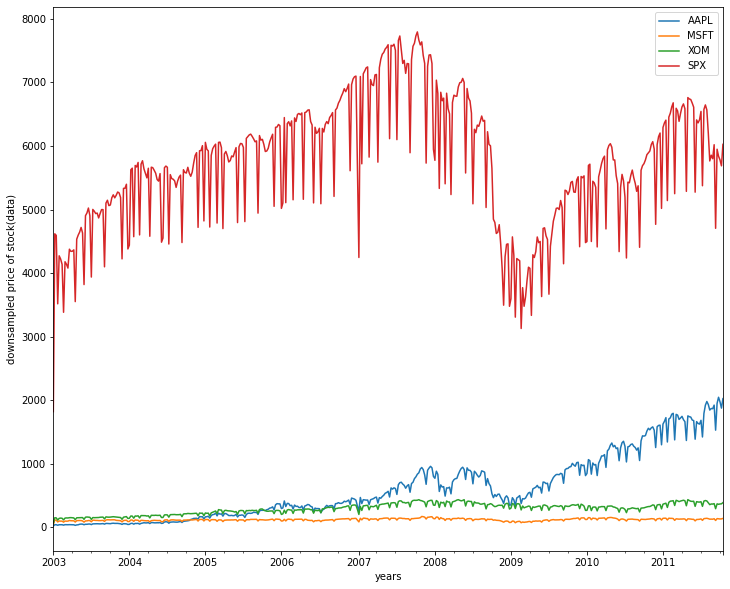

In [ ]:
sample.plot(style='-',figsize=(12,10))
plt.xlabel("years")
plt.ylabel("downsampled price of stock(data)")

Upsampling

In [ ]:
#increse the number of data
upsample=stocks.resample('H')
upsample

In [ ]:
stocks.resample('H').ffill()

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-02 01:00:00,7.40,21.11,29.22,909.03
2003-01-02 02:00:00,7.40,21.11,29.22,909.03
2003-01-02 03:00:00,7.40,21.11,29.22,909.03
2003-01-02 04:00:00,7.40,21.11,29.22,909.03
...,...,...,...,...
2011-10-13 20:00:00,408.43,27.18,76.37,1203.66
2011-10-13 21:00:00,408.43,27.18,76.37,1203.66
2011-10-13 22:00:00,408.43,27.18,76.37,1203.66
2011-10-13 23:00:00,408.43,27.18,76.37,1203.66


Text(0, 0.5, 'Price of the stockes')

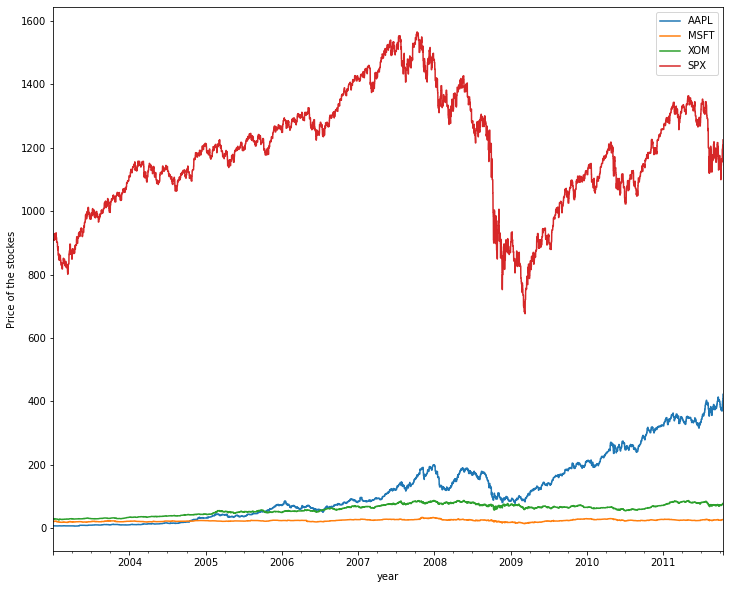

In [ ]:
a=stocks.resample('H').ffill()
a.plot(style='-',figsize=(12,10))

plt.xlabel("year")
plt.ylabel("Price of the stockes")


Moving Window Function

In [ ]:
stock1=stocks[['AAPL','MSFT','XOM']]
stock1=stock1.resample('B').ffill()

Text(0, 0.5, 'Apple stock price')

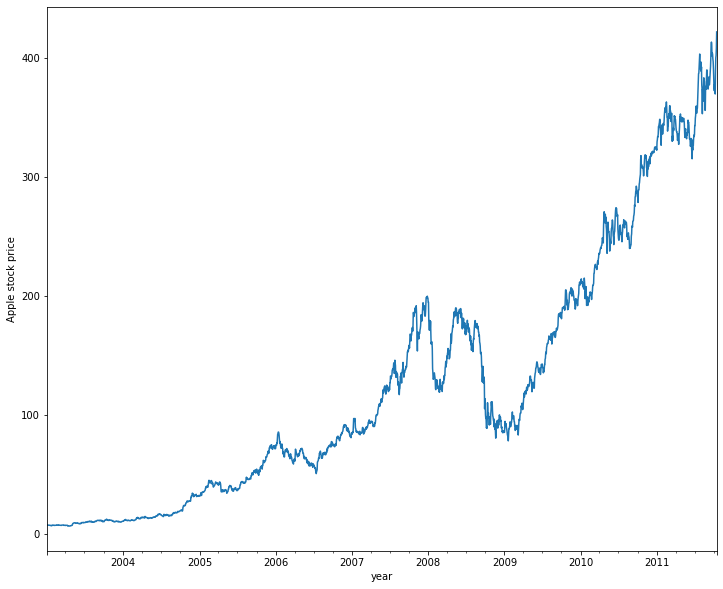

In [ ]:
stock1.AAPL.plot(figsize=(12,10))
plt.xlabel("year")
plt.ylabel("Apple stock price")

Text(0, 0.5, 'Apple mean')

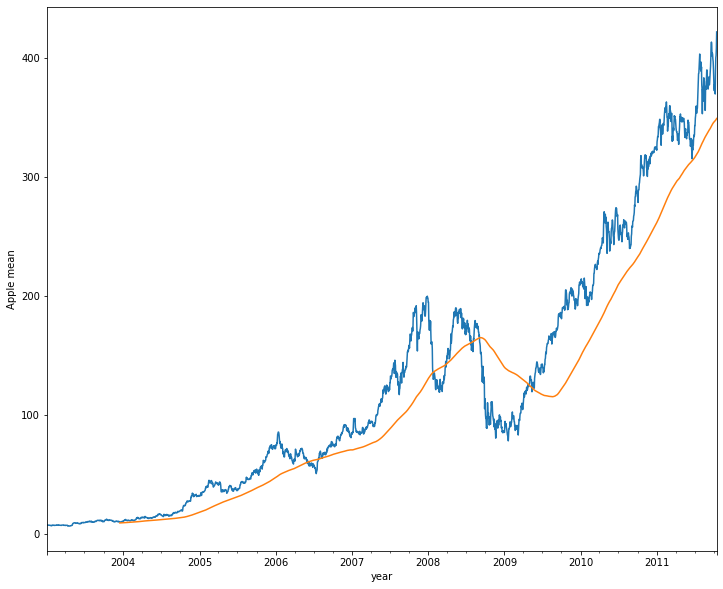

In [ ]:
stock1.AAPL.plot(figsize=(12,10))
stock1.AAPL.rolling(250).mean().plot()
plt.xlabel("year")
plt.ylabel("Apple mean")

Text(0, 0.5, 'Apple std')

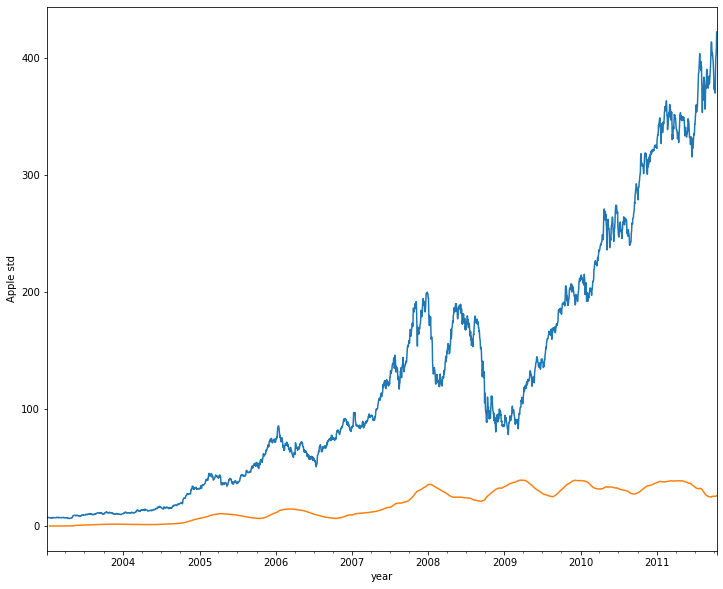

In [ ]:
stock1.AAPL.plot(figsize=(12,10))
one=stock1.AAPL.rolling(250,min_periods=10).std()
one.plot(figsize=(12,10))
plt.xlabel("year")
plt.ylabel("Apple std")

Text(0, 0.5, 'year')

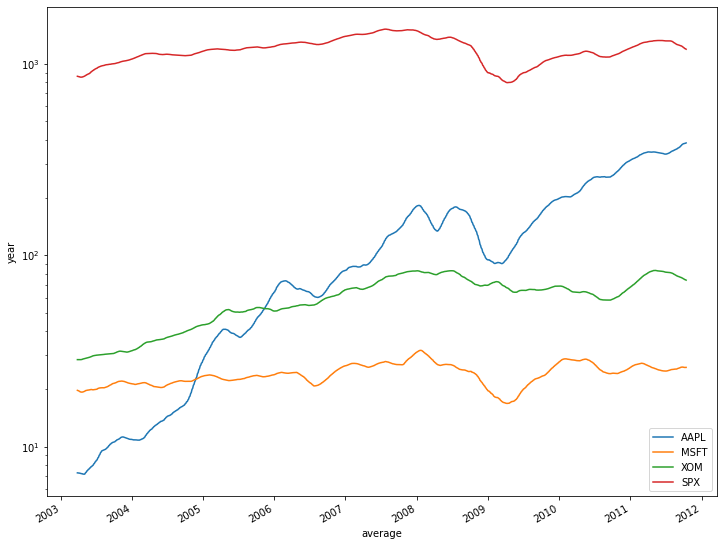

In [ ]:
stocks.rolling(60).mean().plot(logy=True,figsize=(12,10))
plt.xlabel("average")
plt.ylabel("year")

Exponential Weighted Functioons

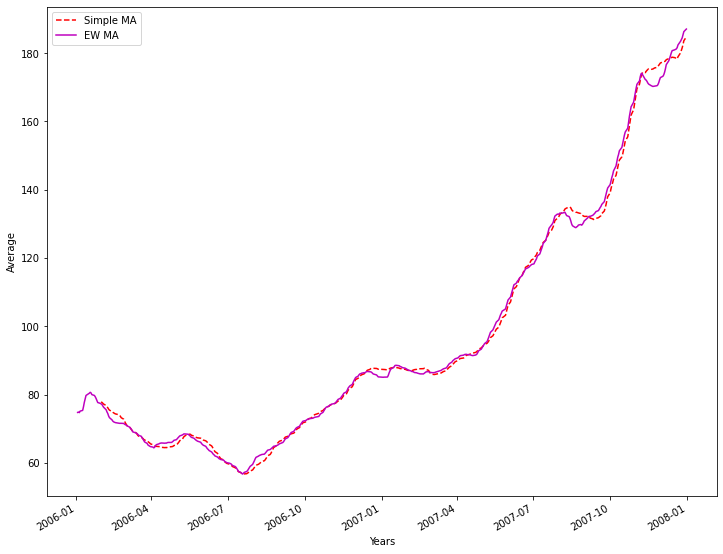

In [ ]:
Apple=stocks.AAPL['2006':'2007']
Moving_average60 = Apple.rolling(30, min_periods=20).mean()
Exponentiallyweighted_moving_average = Apple.ewm(span=30).mean()
Moving_average60.plot(style='r--', label='Simple MA',figsize=(12,10))
Exponentiallyweighted_moving_average.plot(style='m-', label='EW MA')
plt.xlabel("Years")
plt.ylabel("Average")
plt.legend()

In [ ]:
spx=stocks['SPX']
spx_ret=spx.pct_change()
returns=stocks.pct_change()

Text(0, 0.5, 'Percent change')

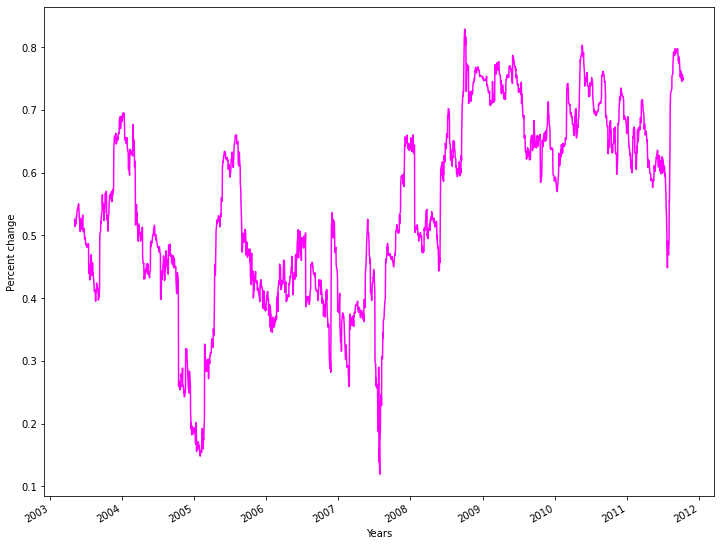

In [ ]:
corr = returns.AAPL.rolling(90, min_periods=85).corr(spx_ret)
corr.plot(figsize=(12,10),color='magenta')


plt.xlabel("Years")
plt.ylabel("Percent change")

Text(0, 0.5, 'Percent change')

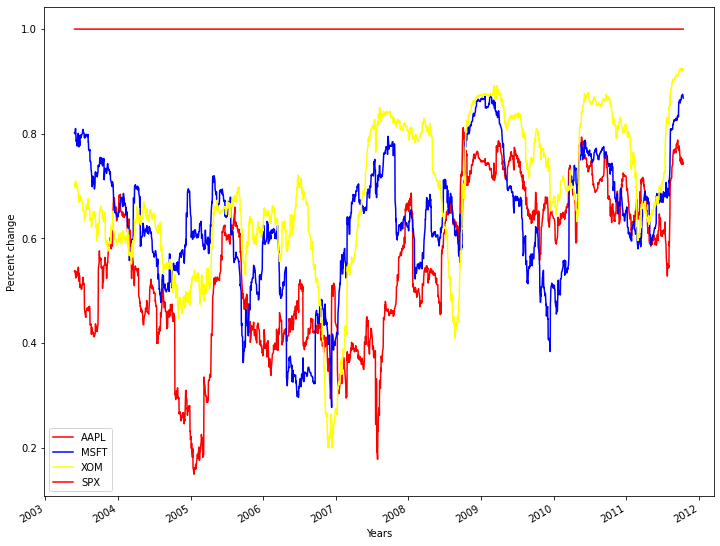

In [ ]:
corr = returns.rolling(100, min_periods=100).corr(spx_ret)
corr.plot(figsize=(12,10),color=['red','blue','yellow'])
plt.xlabel("Years")
plt.ylabel("Percent change")

Using apply to define user defined window functions

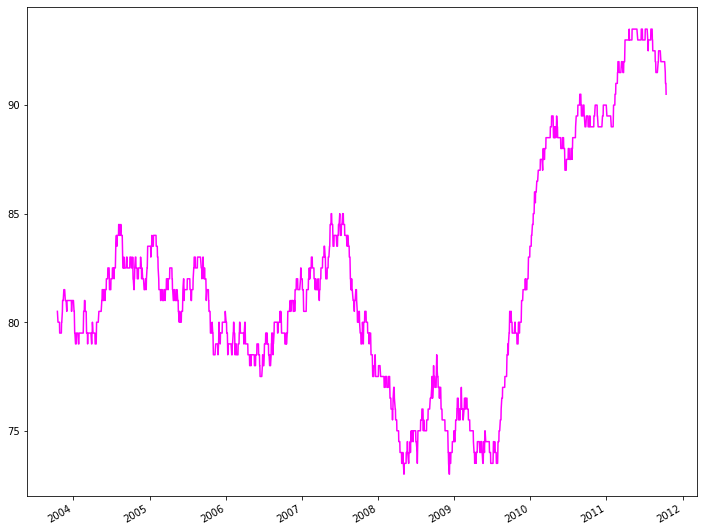

In [ ]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(200).apply(score_at_2percent)
result.plot(figsize=(12,10),color='magenta')

**C. Classifier** 

**Q4**-Consider the Chronic Kidney Disease (CKD) data. Prepare a classifier model as stated above.  Given that a new patient Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD.

In [ ]:
Kidney = pd.read_csv('/content/ckd.csv')
Kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
Kidney.shape

(400, 26)

In [ ]:
Kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
Kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
Kidney.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
kidney = Kidney[['hemo','bgr','classification']]

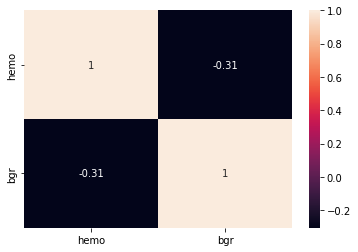

In [ ]:
sns.heatmap(kidney.corr(), annot = True)

In [ ]:
kidney.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
kidney#after correction

,hemo,bgr,classification
0,15.4,121.0,ckd
1,11.3,NaN,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


In [ ]:
kidney.isna().sum()

hemo              52
bgr               44
classification     0
dtype: int64

In [ ]:
#fill the null values with the previous values
kidney.fillna(method='bfill',inplace=True)
kidney.isna().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


hemo              0
bgr               0
classification    0
dtype: int64

In [ ]:
kidney.shape

(400, 3)

In [ ]:
kidney.describe(include=['object'])

,classification
count,400
unique,3
top,ckd
freq,248


In [ ]:
classification = np.array(kidney['classification'])

In [ ]:
for i in range(len(classification)):
    if classification[i]=='ckd\t':
        classification[i]='ckd'
kidney['classification']=classification

<ipython-input-237-4eb8d7e0f7df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['classification']=classification


In [ ]:
kidney.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
lab = LabelEncoder()
mms = MinMaxScaler()

In [ ]:
kidney.describe()

,hemo,bgr
count,400.000000,400.000000
mean,12.388500,147.585000
std,2.865265,79.444928
min,3.100000,22.000000
25%,10.400000,99.000000
50%,12.500000,120.000000
75%,14.800000,163.500000
max,17.800000,490.000000


In [ ]:
kidney.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
cols = kidney.columns
cols

Index(['hemo', 'bgr', 'classification'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in cols:
    kidney[i]=LabelEncoder().fit_transform(kidney[[i]])
kidney.describe()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-243-dc50c79237e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[i]=LabelEncoder().fit_transform(kidney[[i]])


,hemo,bgr,classification
count,400.00000,400.000000,400.000000
mean,60.42500,54.227500,0.375000
std,27.49918,37.164617,0.484729
min,0.00000,0.000000,0.000000
25%,40.00000,26.000000,0.000000
50%,61.00000,47.000000,0.000000
75%,84.00000,78.250000,1.000000
max,114.00000,145.000000,1.000000


In [ ]:
# splitting the data for training and validation
from sklearn.model_selection import train_test_split
y = kidney.pop('classification')
X = kidney
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
#importing Knn and decision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
dtc = DecisionTreeClassifier(random_state=42,max_leaf_nodes=7,min_samples_leaf=13)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC()

In [ ]:
#fitting data
knn.fit(X=X_train,y=y_train)
dtc.fit(X=X_train,y=y_train)
svc.fit(X=X_train,y=y_train)

SVC()

In [ ]:
#predict
knn_ypred = knn.predict(X_test)
dtc_ypred = dtc.predict(X_test)
svc_ypred = svc.predict(X_test)
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

0.95


Text(0.5, 24.0, 'Predicted Values')

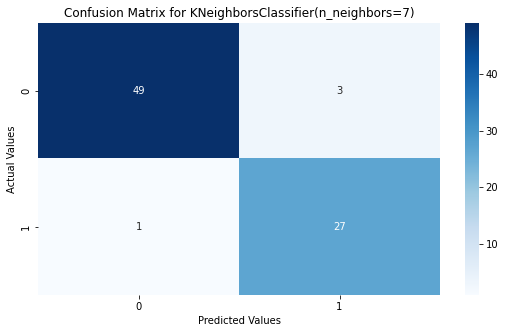

In [ ]:
#for knn
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,knn_ypred))
cm=confusion_matrix(y_test,knn_ypred)
plt.figure(figsize=(9,5))
plt.title(f"Confusion Matrix for {knn}")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

0.95


Text(0.5, 24.0, 'Predicted Values')

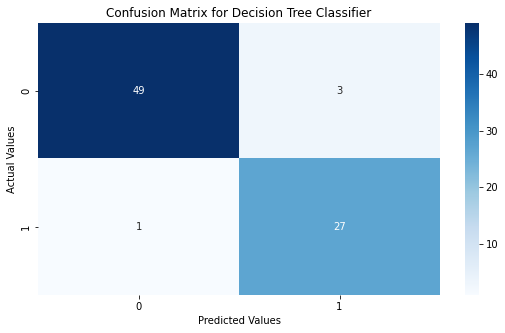

In [ ]:
#for dct
print(accuracy_score(y_test,dtc_ypred))
cm=confusion_matrix(y_test,dtc_ypred)
plt.figure(figsize=(9,5))
plt.title(f"Confusion Matrix for {'Decision Tree Classifier'}")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

0.9625


Text(0.5, 24.0, 'Predicted Values')

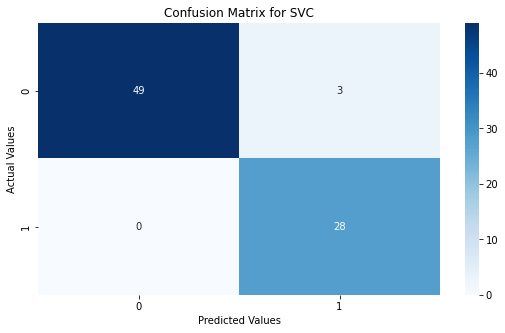

In [ ]:
#for svc
print(accuracy_score(y_test,svc_ypred))
cm=confusion_matrix(y_test,svc_ypred)
plt.figure(figsize=(9,5))
plt.title(f"Confusion Matrix for {'SVC'}")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD

In [ ]:
hem = np.array(kidney['hemo'])
glu = np.array(kidney['bgr'])

In [ ]:
s_h = np.std(hem)
g_h = np.std(glu)
s_m = np.mean(hem)
g_m = np.mean(glu)

In [ ]:
ali_h = (0*s_h)+s_m
ali_g = (1.1*g_h)+g_m
alice = pd.DataFrame({
    'hemo':[ali_h],
    'bgr':[ali_g]
})
alice

,hemo,bgr
0,60.425,95.057446


In [ ]:
ali_knn = knn.predict(alice)
ali_dtc = dtc.predict(alice)
ali_svc = svc.predict(alice)

In [ ]:
print(f'Prediction of disease in KNN : {ali_knn}')
print(f'Prediction of disease in DCT : {ali_dtc}')
print(f'Prediction of disease in SVC : {ali_svc}')

Prediction of disease in KNN : [0]
Prediction of disease in DCT : [0]
Prediction of disease in SVC : [0]


All the models predicted as o

So, Alice dosen't have the disease

**Q5**-Prepare a  classifier model  for wine dataset – wine.csv.

In [ ]:
wine = pd.read_csv('/content/Wine.csv')
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [ ]:
wine.isna().sum()
#no null values so no need to process null values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [ ]:
for i in wine.columns:
    wine[i]=LabelEncoder().fit_transform(wine[[i]])
wine.describe()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.00000,178.000000
mean,60.123596,60.910112,38.679775,34.567416,20.078652,49.691011,63.539326,17.679775,50.028090,61.820225,40.095506,59.786517,58.47191,0.938202
std,35.135033,36.015107,19.430994,15.240388,12.228267,26.528314,37.555851,9.863689,27.499857,36.886775,20.812504,33.717159,32.40234,0.775035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,30.250000,34.250000,24.000000,24.000000,9.000000,26.250000,31.250000,10.000000,29.000000,29.250000,23.250000,30.250000,33.25000,0.000000
50%,59.000000,53.500000,37.000000,38.000000,19.000000,51.500000,63.500000,17.000000,49.500000,61.500000,41.500000,63.000000,55.50000,1.000000
75%,89.750000,90.750000,54.750000,46.000000,28.000000,73.000000,94.750000,24.750000,73.000000,91.000000,57.000000,86.000000,86.00000,2.000000
max,125.000000,132.000000,78.000000,62.000000,52.000000,96.000000,131.000000,38.000000,100.000000,131.000000,77.000000,121.000000,120.00000,2.000000


In [ ]:
y = wine.pop('Customer_Segment')
X = wine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(133, 13) (45, 13) (133,) (45,)


Linear Reression: 
Training Accuracy :1.0
Accuracy :0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.98        21
           2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

---------------------------------
K-Nearest neighbours: 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy :0.9699248120300752
Accuracy :0.9333333333333333
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45

---------------------------------
Decision Tree Classifier: 
Training Accuracy :1.0
Accuracy :0.9333333333333333
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.90      0.93        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.93      0.93      0.93        45

---------------------------------
Support Vector machine: 

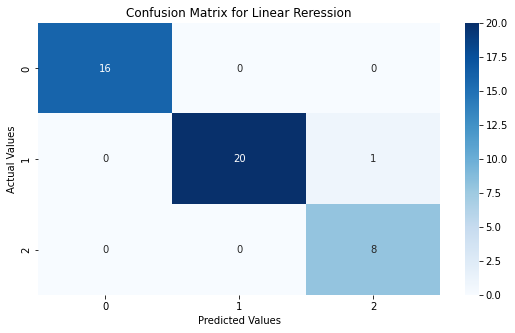

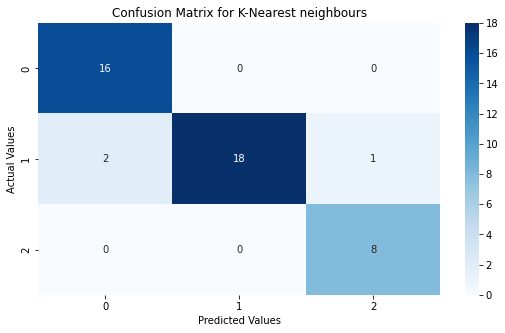

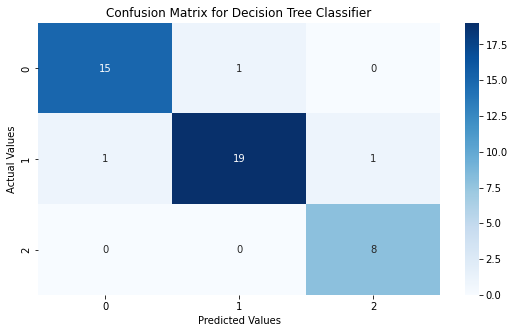

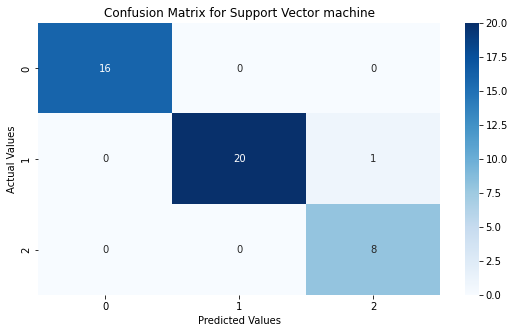

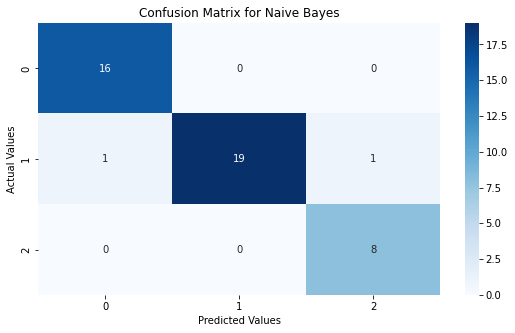

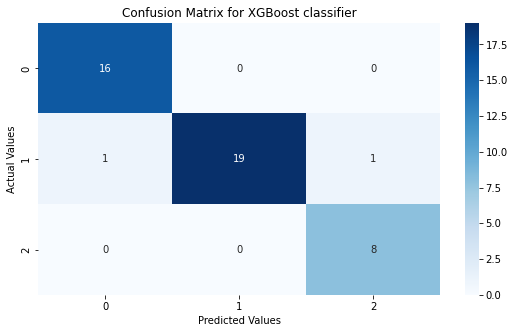

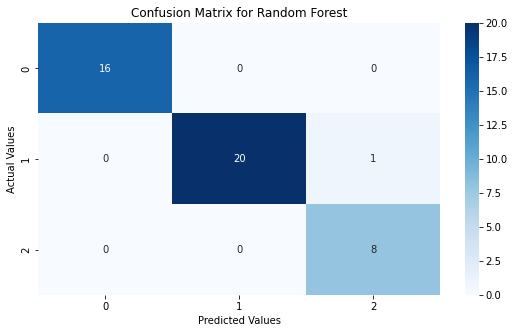

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score,f1_score,fbeta_score,classification_report
models={
    'Linear Reression':LogisticRegression(),
    'K-Nearest neighbours':KNeighborsClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Support Vector machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'XGBoost classifier':XGBClassifier(),
    'Random Forest':RandomForestClassifier()
    
}
y_predicitions=[]
y_accu=[]
x_graph=[]
for name,model in  models.items():
    print(f'{name}: ')
    x_graph.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_predicitions.append(y_pred)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(X_train))}')
    print(f'Accuracy :{accuracy_score(y_test,y_pred)}')
    y_accu.append(accuracy_score(y_test,y_pred)*100)
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(9,5))
    plt.title(f"Confusion Matrix for {name}")
    sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print(classification_report(y_test,y_pred, ))
    print('-'*33)

**Q6**-Prepare a classifier model for breast-cancer.csv  dataset.

In [ ]:
cancer=wine = pd.read_csv('/content/breast cancer.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
#remove unwanted col
cancer.drop(columns=['id'], inplace=True)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
cancer.isnull().sum() # null values in the dataset

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [ ]:
#drop Unnamed: 32 col
cancer.drop(columns=['Unnamed: 32'], inplace=True)

In [ ]:
for i in cancer.columns:
    cancer[i]=LabelEncoder().fit_transform(cancer[[i]])
cancer.describe()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,219.586995,236.855888,264.537786,268.790861,253.130053,271.586995,263.478032,264.727592,210.100176,...,221.154657,253.363796,263.010545,271.968366,205.957821,262.147627,264.219684,237.790861,247.949033,268.906854
std,0.483918,125.770848,133.385694,151.005745,154.619229,136.250342,154.125189,158.267635,159.494408,118.236672,...,125.999108,144.907096,146.811822,156.612745,109.645933,151.004941,157.531181,144.145369,141.957663,153.812855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,118.000000,125.000000,134.000000,136.000000,136.000000,138.000000,126.000000,127.000000,110.000000,...,116.000000,131.000000,138.000000,136.000000,116.000000,134.000000,130.000000,112.000000,126.000000,136.000000
50%,0.000000,209.000000,235.000000,266.000000,268.000000,265.000000,277.000000,265.000000,263.000000,205.000000,...,218.000000,254.000000,271.000000,275.000000,204.000000,259.000000,265.000000,242.000000,251.000000,269.000000
75%,1.000000,322.000000,347.000000,396.000000,401.000000,373.000000,403.000000,398.000000,402.000000,306.000000,...,326.000000,376.000000,387.000000,408.000000,295.000000,393.000000,401.000000,362.000000,369.000000,400.000000
max,1.000000,455.000000,478.000000,521.000000,538.000000,473.000000,536.000000,536.000000,541.000000,431.000000,...,456.000000,510.000000,513.000000,543.000000,410.000000,528.000000,538.000000,491.000000,499.000000,534.000000


In [ ]:
y = cancer.pop('diagnosis')
X = cancer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


Linear Reression: 
Training Accuracy :0.9178403755868545
Accuracy :0.9370629370629371
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        90
           1       0.91      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



---------------------------------
K-Nearest neighbours: 
Training Accuracy :0.9741784037558685
Accuracy :0.972027972027972
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

---------------------------------
Decision Tree Classifier: 
Training Accuracy :1.0
Accuracy :0.9020979020979021
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        90
           1       0.81      0.96      0.88        53

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143

---------------------------------
Support Vector machine: 
Training Accuracy :0.9882629107981221
Accuracy :0.

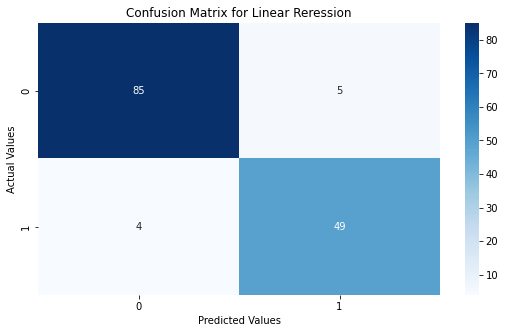

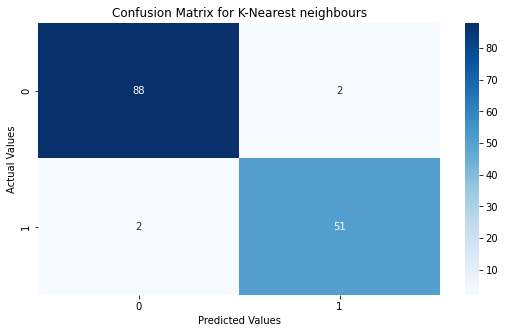

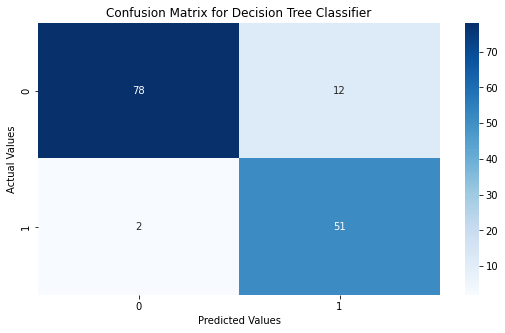

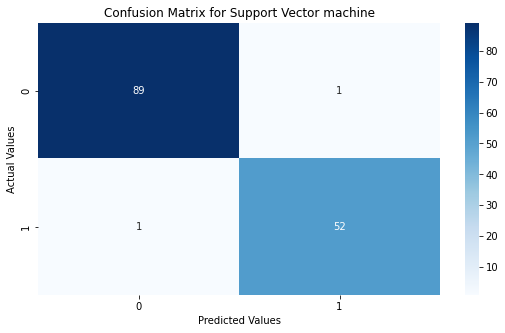

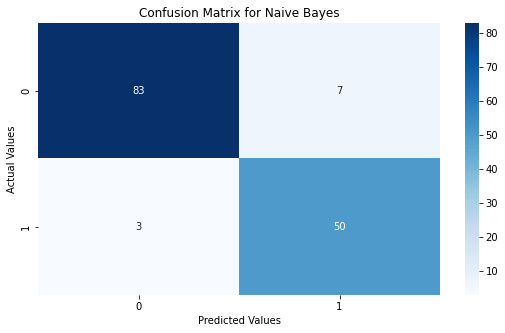

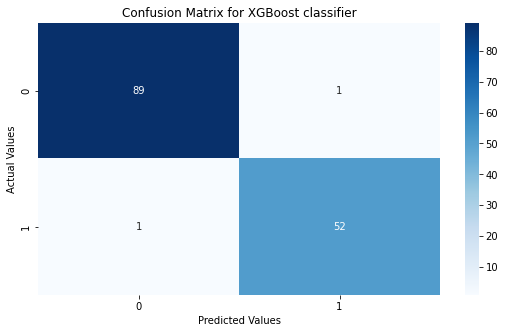

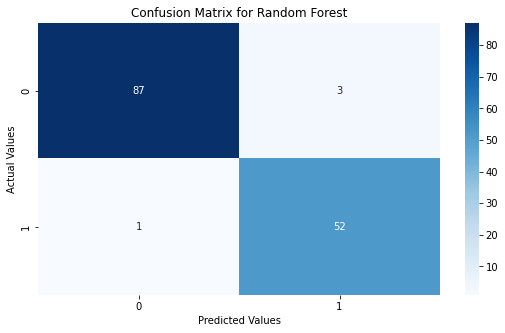

In [ ]:
models={
    'Linear Reression':LogisticRegression(),
    'K-Nearest neighbours':KNeighborsClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Support Vector machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'XGBoost classifier':XGBClassifier(),
    'Random Forest':RandomForestClassifier()
    
}
y_predicitions=[]
y_accu=[]
x_graph=[]
for name,model in  models.items():
    print(f'{name}: ')
    x_graph.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_predicitions.append(y_pred)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(X_train))}')
    print(f'Accuracy :{accuracy_score(y_test,y_pred)}')
    y_accu.append(accuracy_score(y_test,y_pred)*100)
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(9,5))
    plt.title(f"Confusion Matrix for {name}")
    sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print(classification_report(y_test,y_pred, ))
    print('-'*33)

**D. Regression**

**Q7.** Predict Home prices employing multiple regression. Compare performance with a KNN  Regressor model used for prediction. Draw a residual plot for these predictions and offer your comments. 


In [ ]:
house= pd.read_csv('/content/Housing.csv')
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
house.isna().sum()
#so no null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
for i in house.columns:
    house[i]=LabelEncoder().fit_transform(house[[i]])
house.describe()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,95.728440,135.471560,1.965138,0.286239,0.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,56.256108,76.059693,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,71.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,87.000000,130.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,137.000000,196.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,218.000000,283.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
y = house.pop('price')
X = house
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(408, 12) (137, 12) (408,) (137,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
regressor = LinearRegression()
knr = KNeighborsRegressor()

In [ ]:
#for linear regressor
regressor.fit(X_train,y_train)
lr_pred = regressor.predict(X_test)
#for KNN regressor
knr.fit(X_train,y_train)
knr_pred = knr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


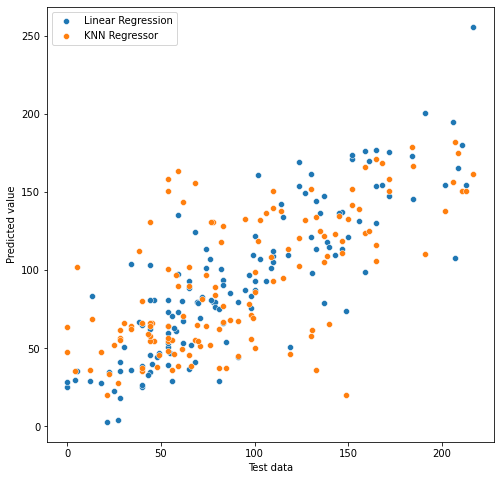

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(y_test,lr_pred)
sns.scatterplot(y_test,knr_pred)
plt.legend(['Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


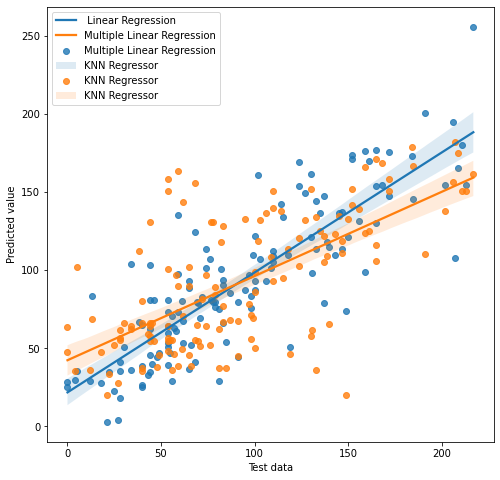

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(y_test,lr_pred)
sns.regplot(y_test,knr_pred)
plt.legend([' Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


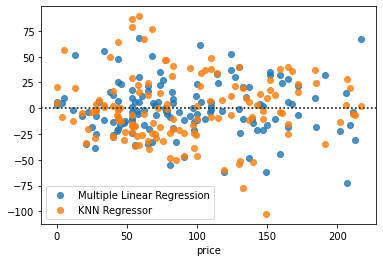

In [ ]:
sns.residplot(y_test,lr_pred,label='Multiple Linear Regression')
sns.residplot(y_test,knr_pred,label='KNN Regressor')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#for mlr
rmae = mean_absolute_error(y_test,lr_pred)
rmse = mean_squared_error(y_test,lr_pred)
rr2 = r2_score(y_test,lr_pred)
#for knnr
kmae = mean_absolute_error(y_test,knr_pred)
kmse = mean_squared_error(y_test,knr_pred)
kr2 = r2_score(y_test,knr_pred)


In [ ]:
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['Multiple Linear Regression','KNN Regressor']
metrics_df

,MAE,MSE,R2 score
Multiple Linear Regression,21.397086,809.680918,0.712044
KNN Regressor,30.491971,1612.834161,0.426410


#### **Comments :** 

Multiple linear regression has the least error and maximum accuracy than KNN regressor

So Multiple Linear Regression is better


**Q8. Implement a logistic regression model – employ scikit-learn library functions.**

In [ ]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
titanic_df = titanic['data']
titanic_df['survived'] = titanic['target']
titanic_df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


In [ ]:
#name is definetly not needed so remove it
titanic_df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)
 
# remove less interesting features
titanic_df.drop(['name','ticket','home.dest'], axis=1, inplace=True)

In [ ]:
titanic_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,female,29.0000,0.0,0.0,211.3375,S,1
1,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,female,2.0000,1.0,2.0,151.5500,S,0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,0


In [ ]:
for i in titanic_df.columns:
    titanic_df[i]=LabelEncoder().fit_transform(titanic_df[[i]])
titanic_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,0,44,0,0,273,2,1
1,0,1,6,1,2,270,2,1
2,0,0,8,1,2,270,2,0
3,0,1,45,1,2,270,2,0
4,0,0,38,1,2,270,2,0


In [ ]:
import seaborn as sns
sns.barplot(x="Sex", y="Survived", data=_titanic_df)

In [ ]:
titanic_df['survived'].unique()

array([1, 0])

In [ ]:
titanic_df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

In [ ]:
age = titanic_df['age']
ages = [i for i in age if (i>=0 and i<=1)]
ages

[1, 0]

In [ ]:
avg_age = np.array(ages).mean()
for i in range(len(age)):
    if (age[i]>=0 and age[i]<=1):
        pass
    else:
        age[i]=avg_age
titanic_df['age']=age
titanic_df['age']

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: age, Length: 1309, dtype: int64

In [ ]:
y = titanic_df.pop('survived')
X = titanic_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(981, 7) (328, 7) (981,) (328,)


In [ ]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7896341463414634
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       208
           1       0.73      0.68      0.70       120

    accuracy                           0.79       328
   macro avg       0.77      0.77      0.77       328
weighted avg       0.79      0.79      0.79       328



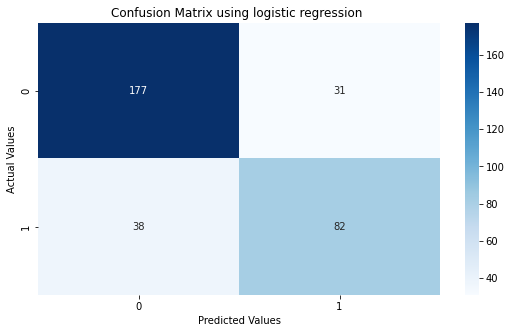

In [ ]:
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,5))
plt.title("Confusion Matrix using logistic regression ")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print(classification_report(y_test,y_pred, ))

**The End**